### Avichal Bansal
### 202011015


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv("Exam_Data - Exam_Data.csv")

In [107]:
df.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.986999,Energy,Onshore gas,Fugitive,2022,Not available


In [108]:
df.dtypes

Unnamed: 0      int64
region         object
country        object
emissions     float64
type           object
segment        object
reason         object
baseYear       object
notes          object
dtype: object

In [109]:
print("Null entries in the dataset:")
print(df.isnull().sum())

Null entries in the dataset:
Unnamed: 0    0
region        0
country       0
emissions     0
type          0
segment       0
reason        0
baseYear      0
notes         0
dtype: int64


There are no null enetries in the dataset

### Q1. Perform data pre-processing if necessary.

There is no requirement of the first column to specify the index of the rows.
So, We can remove the first column

In [110]:
df = df.drop(df.columns[0],axis=1)

In [111]:
df.head()

,region,country,emissions,type,segment,reason,baseYear,notes
0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,Africa,Algeria,213.986999,Energy,Onshore gas,Fugitive,2022,Not available


### Q2 Visualize this dataset using at least 3 different types of graphs.

### Graphs

# The idea is to calculate average emissions region wise

In [112]:
region = df.groupby('region') 
region.first()

,country,emissions,type,segment,reason,baseYear,notes
region,,,,,,,
Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
Asia Pacific,Australia,2450.463135,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
Central and South America,Argentina,3152.932617,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
Europe,Denmark,240.093613,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
Middle East,Bahrain,0.964592,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
North America,Canada,1072.710693,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
Other,Other,7259.014160,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
Russia & Caspian,Azerbaijan,195.197525,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
World,World,141953.765600,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...


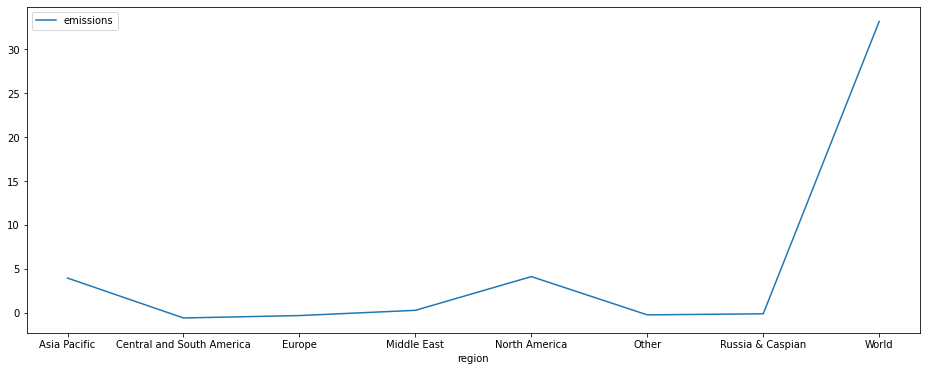

In [113]:
emission_mean = region.mean().pct_change()
fig = emission_mean.plot(kind='line',figsize = (16,6))


<AxesSubplot:>

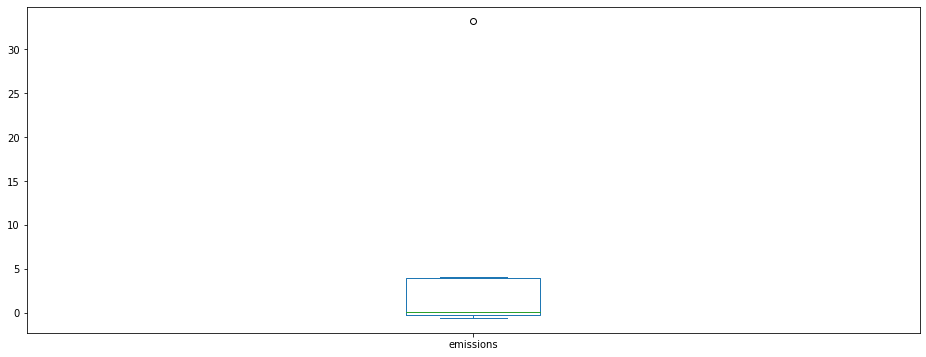

In [119]:
result =  pd.concat([emission_mean, emission_mean_reason, emission_mean_segment, emission_mean_type], axis = 1)
box_df.columns = ['WIPRO Returns', 'TCS Returns', 'HCLTECH Returns', 'INFY Returns']
box_df.plot(kind = 'box', figsize = (16,6))

The above graph shows the percentage change of the regions that is their percentage contribution to the emissions.

In [114]:
print(emission_mean)

                           emissions
region                              
Africa                           NaN
Asia Pacific                3.930288
Central and South America  -0.621059
Europe                     -0.346654
Middle East                 0.250253
North America               4.097574
Other                      -0.266450
Russia & Caspian           -0.146439
World                      33.194612


# The idea is to calculate average emissions type wise i.e. the source of those emissions

In [115]:
type = df.groupby('type') 
type.first()

,region,country,emissions,segment,reason,baseYear,notes
type,,,,,,,
Agriculture,Africa,Algeria,257.611206,Total,All,2019-2021,Average based on United Nations Framework Conv...
Energy,Africa,Algeria,0.052000,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
Other,Africa,Algeria,6.475721,Total,All,2019-2021,Average based on United Nations Framework Conv...
Waste,Africa,Algeria,510.965607,Total,All,2019-2021,Average based on United Nations Framework Conv...


<AxesSubplot:xlabel='type'>

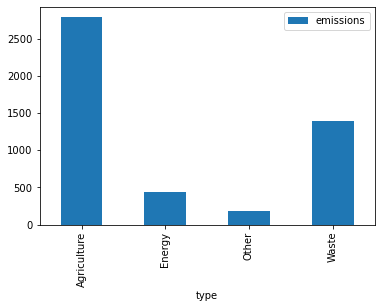

In [116]:
emission_mean_type = type.mean()
emission_mean_type.plot(kind='bar')

<AxesSubplot:xlabel='type'>

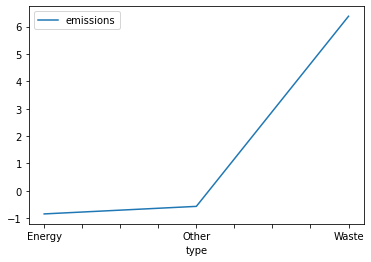

In [118]:
emission_mean_type = type.mean()
emission_mean_type.plot(kind='line')

<b>Conclusion:</b>
After divding the dataset segment wise we got the idea of emissions by different types like Agriculture, Energy, Others and Waste
Due to agriculture, emissions ocuurs the most while due to others contribute less.

In [ ]:
print(emission_mean_type)

               emissions
type                    
Agriculture  2788.179702
Energy        435.844535
Other         188.253780
Waste        1388.937314


# The idea is to calculate average emissions reason wise i.e. how these emissions made their way out.

In [ ]:
reason = df.groupby('reason')
reason.first()

,region,country,emissions,type,segment,baseYear,notes
reason,,,,,,,
All,Africa,Algeria,257.611206,Agriculture,Total,2019-2021,Average based on United Nations Framework Conv...
Flared,Africa,Algeria,469.786987,Energy,Onshore oil,2022,Not available
Fugitive,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,2022,Not available
Vented,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,2022,Not available


<AxesSubplot:xlabel='reason'>

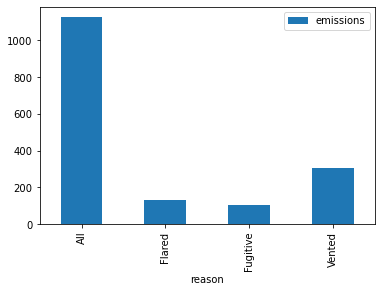

In [ ]:
emission_mean_reason = reason.mean()
emission_mean_reason.plot(kind='bar')

<b>Conclusion:</b>
After divding the dataset segment wise we got the idea of emissions by different reason of emissions.
Most of the emissions occured because of all the three reasons of emissions.
But if we go by one reason only Vented is the major reason while fugitive is the lesser contributor to emissions

# The idea is to calculate average emissions segment wise

In [ ]:
segment = df.groupby('segment') 
segment.first()

,region,country,emissions,type,reason,baseYear,notes
segment,,,,,,,
Bioenergy,Africa,Algeria,0.052000,Energy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
Coking coal,Africa,Mozambique,60.537800,Energy,All,2022,Not available
Gas pipelines and LNG facilities,Africa,Algeria,130.798996,Energy,Fugitive,2022,Not available
Offshore gas,Africa,Cameroon,4.402110,Energy,Fugitive,2022,Not available
Offshore oil,Africa,Angola,47.643501,Energy,Flared,2022,Not available
Onshore gas,Africa,Algeria,213.986999,Energy,Fugitive,2022,Not available
Onshore oil,Africa,Algeria,469.786987,Energy,Flared,2022,Not available
Other from coal,Africa,Algeria,0.004000,Energy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
Other from oil and gas,Africa,Algeria,14.208550,Energy,All,2022,Estimates from end-uses are for 2020 or 2021 (...


<AxesSubplot:ylabel='segment'>

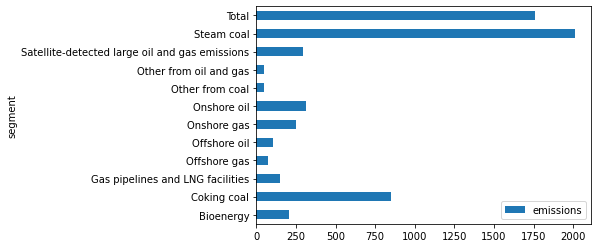

In [ ]:
emission_mean_segment = segment.mean()
emission_mean_segment.plot(kind='barh')

In [ ]:
print(emission_mean_segment)

                                                  emissions
segment                                                    
Bioenergy                                        205.746754
Coking coal                                      846.794086
Gas pipelines and LNG facilities                 150.003926
Offshore gas                                      73.608786
Offshore oil                                     105.526728
Onshore gas                                      250.379635
Onshore oil                                      315.966559
Other from coal                                   48.754910
Other from oil and gas                            48.831729
Satellite-detected large oil and gas emissions   295.661905
Steam coal                                      2011.459111
Total                                           1756.188626


<b>Conclusion:</b>
After divding the dataset segment wise we got the idea of emissions by different segments like steam coal, onshore oil, etc.
The Steam coal has the maximum emission  while the coal and (oil and gas) segment are almost same as the lowest contributor to the emissions

<AxesSubplot:>

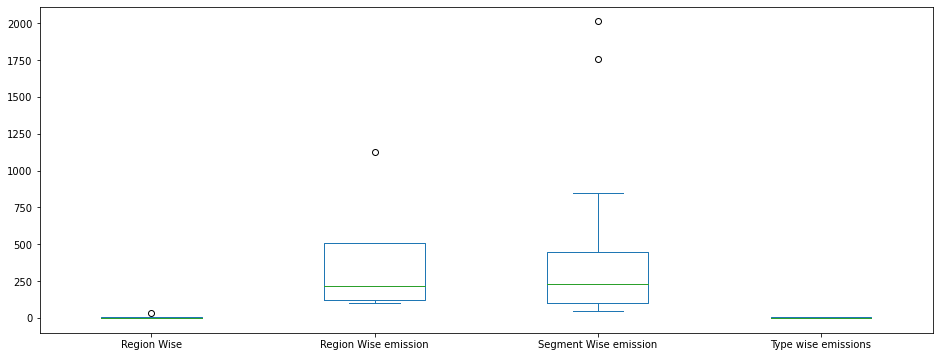

In [121]:
result =  pd.concat([emission_mean, emission_mean_reason, emission_mean_segment, emission_mean_type], axis = 1)
result.columns = ['Region Wise', 'Region Wise emission', 'Segment Wise emission', 'Type wise emissions']
result.plot(kind = 'box', figsize = (16,6))